In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import seaborn as sns

In [2]:
def plot_coefficient(df, cell_count,coef):
    """
    Esta función toma un DataFrame que tiene las columnas 'K', 'Rem', y 'cdrag',
    y la cantidad de celdas en un pack de baterías, luego genera un gráfico de dispersión
    del coeficiente de arrastre versus el número de Reynolds.
    """
    # Crear un scatter plot
    plt.figure(figsize=(10,6))
    if coef == "cdrag":
        scatter = plt.scatter(df['Rem'], df[f'{coef}'], c=df['K'], cmap='viridis', label=str(cell_count))
    elif coef == "ff":
        scatter = plt.scatter(df['Rem'], df['frictionFactor'], c=df['K'], cmap='viridis', label=str(cell_count))
    elif coef == "n":
        scatter = plt.scatter(df['Rem'], df['nusselt'], c=df['K'], cmap='viridis', label=str(cell_count))
    plt.colorbar(scatter, label='S (K value)')
    
    # Agregar una línea vertical 
    plt.axvline(x=3200, color='r', linestyle='--')
    
    # Etiquetas y título
    plt.title(f'{coef} vs. Número de Reynolds (Pack de {cell_count} celdas)')
    plt.xlabel('Número de Reynolds (Re)')
    plt.ylabel(f'{coef}')
    
    # Mostrar el gráfico
    plt.grid(True)
    plt.show()


def concatenar_dataframes(lista_dataframes):
    """
    Concatena una lista de DataFrames en un único DataFrame.

    Parámetros:
    lista_dataframes (list): Lista de DataFrames de pandas para concatenar.

    Retorna:
    pd.DataFrame: DataFrame resultante de la concatenación.
    """
    return pd.concat(lista_dataframes, ignore_index=True)


## carga de datos

In [3]:
# Carga de los datos
df_cdrag_25 = pd.read_csv('resources/LIB/CI/df_cdrag_25.txt', sep=',')
df_cdrag_53 = pd.read_csv('resources/LIB/CI/df_cdrag_53.txt', sep=',')
df_cdrag_74 = pd.read_csv('resources/LIB/CI/df_cdrag_74.txt', sep=',')
df_cdrag_102 = pd.read_csv('resources/LIB/CI/df_cdrag_102.txt', sep=',')
df_cdrag_concat = concatenar_dataframes([df_cdrag_25,df_cdrag_53,df_cdrag_74,df_cdrag_102])

# Carga de los datos
df_ff_25 = pd.read_csv('resources/LIB/CI/df_ff_25.txt', sep=',')
df_ff_53 = pd.read_csv('resources/LIB/CI/df_ff_53.txt', sep=',')
df_ff_74 = pd.read_csv('resources/LIB/CI/df_ff_74.txt', sep=',')
df_ff_102 = pd.read_csv('resources/LIB/CI/df_ff_102.txt', sep=',')
df_ff_concat = concatenar_dataframes([df_ff_25,df_ff_53,df_ff_74,df_ff_102])

# Carga de los datos
df_n_25 = pd.read_csv('resources/LIB/CI/df_n_25.txt', sep=',')
df_n_53 = pd.read_csv('resources/LIB/CI/df_n_53.txt', sep=',')
df_n_74 = pd.read_csv('resources/LIB/CI/df_n_74.txt', sep=',')
df_n_102 = pd.read_csv('resources/LIB/CI/df_n_102.txt', sep=',')
df_n_concat = concatenar_dataframes([df_n_25,df_n_53,df_n_74,df_n_102])

# test Choice 2
df_test_ch2 ={}
df_test_ch2['cdrag'] = {}
df_test_ch2['ff'] = {}
df_test_ch2['n'] = {}

df_test_ch2['cdrag']['1'] = pd.read_csv('resources/LIB/CI2/df_cdrag_53_1.txt', sep=',')
df_test_ch2['cdrag']['2'] = pd.read_csv('resources/LIB/CI2/df_cdrag_53_2.txt', sep=',')
df_test_ch2['ff']['1'] = pd.read_csv('resources/LIB/CI2/df_ff_53_1.txt', sep=',')
df_test_ch2['ff']['2'] = pd.read_csv('resources/LIB/CI2/df_ff_53_2.txt', sep=',')
df_test_ch2['n']['1'] = pd.read_csv('resources/LIB/CI2/df_n_53_1.txt', sep=',')
df_test_ch2['n']['2'] = pd.read_csv('resources/LIB/CI2/df_n_53_2.txt', sep=',')

# test choice 3
df_test_ch3 ={}
df_test_ch3['cdrag'] = {}
df_test_ch3['ff'] = {}
df_test_ch3['n'] = {}

df_test_ch3['cdrag']['1'] = pd.read_csv('resources/LIB/CI3/df_cdrag_53_1.txt', sep=',')
df_test_ch3['cdrag']['2'] = pd.read_csv('resources/LIB/CI3/df_cdrag_53_2.txt', sep=',')
df_test_ch3['ff']['1'] = pd.read_csv('resources/LIB/CI3/df_ff_53_1.txt', sep=',')
df_test_ch3['ff']['2'] = pd.read_csv('resources/LIB/CI3/df_ff_53_2.txt', sep=',')
df_test_ch3['n']['1'] = pd.read_csv('resources/LIB/CI3/df_n_53_1.txt', sep=',')
df_test_ch3['n']['2'] = pd.read_csv('resources/LIB/CI3/df_n_53_2.txt', sep=',')

# test prop_3
df_test_prop3 ={}
df_test_prop3['cdrag'] = {}
df_test_prop3['ff'] = {}
df_test_prop3['n'] = {}

df_test_prop3['cdrag']['1'] = pd.read_csv('resources/LIB/CI4/df_cdrag_53_1.txt', sep=',')
df_test_prop3['cdrag']['2'] = pd.read_csv('resources/LIB/CI4/df_cdrag_53_2.txt', sep=',')
df_test_prop3['ff']['1'] = pd.read_csv('resources/LIB/CI4/df_ff_53_1.txt', sep=',')
df_test_prop3['ff']['2'] = pd.read_csv('resources/LIB/CI4/df_ff_53_2.txt', sep=',')
df_test_prop3['n']['1'] = pd.read_csv('resources/LIB/CI4/df_n_53_1.txt', sep=',')
df_test_prop3['n']['2'] = pd.read_csv('resources/LIB/CI4/df_n_53_2.txt', sep=',')

## variables 

In [4]:
coeficientes = ['cdrag','ff','n']
choice_1 = "choice_1"
choice_2 = "choice 2"
choice_3 = "choice_3"
choice_4 = "choice_4"
prop_1 = "prop_1"
prop_3 = "prop_3"
choices = [choice_1,choice_2,choice_3,choice_4,prop_1,prop_3]

test_diccionario = {'cdrag':df_cdrag_53, 'ff': df_ff_53, 'n': df_n_53}

# Funciones

In [5]:
def load_csv(file_path):
    df = pd.read_csv(file_path)
    return df.sort_values(by=['fitness_validation']).iloc[0]

def process_files(coef, iteraciones, prefix, dic_results,extra_path=""):
    for it in range(iteraciones):
        file_path = f'results/{extra_path}{coef}_{prefix}/run_1/iteration_{it}.csv'
        # Aquí, ya nos aseguramos de que dic_results[f'{coef}'] existe
        dic_results[f'{it}'] = load_csv(file_path)


def load_results(iteraciones, suf):
    dic_results = {}
    for coef in coeficientes:
        dic_results[f'{coef}'] = {}
        if suf == "original":
            process_files(coef, iteraciones, "original", dic_results[f'{coef}'])
        elif suf == choice_1:
            for j in range(3):
                dic_results[f'{coef}'][f'{j+1}'] = {}
                process_files(coef, iteraciones, f'{j+1}', dic_results[f'{coef}'][f'{j+1}'])
        elif suf == choice_2:
            for prefix in ["laminar_1", "turbulento_2"]:
                dic_results[f'{coef}'][prefix] = {}
                process_files(coef, iteraciones, prefix, dic_results[f'{coef}'][prefix])
        elif suf == choice_3:
            for prefix in ["inspeccion_1", "inspeccion_2"]:
                dic_results[f'{coef}'][prefix] = {}
                process_files(coef, iteraciones, prefix, dic_results[f'{coef}'][prefix])
        elif suf == choice_4:
            for prefix in ["laminar_1", "turbulento_2"]:
                dic_results[f'{coef}'][prefix] = {}
                process_files(coef, iteraciones, prefix, dic_results[f'{coef}'][prefix],extra_path="100ch2/")
        elif suf == prop_1:
            for prefix in ["1", "2"]:
                dic_results[f'{coef}'][prefix] = {}
                process_files(coef, iteraciones, prefix, dic_results[f'{coef}'][prefix],extra_path="prop1/")
        elif suf == prop_3:
            for prefix in ["1", "2"]:
                dic_results[f'{coef}'][prefix] = {}
                process_files(coef, iteraciones, prefix, dic_results[f'{coef}'][prefix],extra_path="prop3/")
    return dic_results


In [6]:
def plot_evolution(results, iteraciones, structure_type="original"):
    for coef in coeficientes:
        if structure_type == "original":
            # Preparar listas para almacenar los valores de cada iteración
            fitness_values = []
            fitness_val_values = []
            error_test_values = []

            for i in range(iteraciones):
                data = results[f'{coef}'][f'{i}']
                fitness_values.append(data.fitness)
                fitness_val_values.append(data.fitness_validation)
                other_info_dict = ast.literal_eval(data.other_info)
                error_test_values.append(other_info_dict['errortest'])
            # Crear un gráfico para este coeficiente
            plt.figure()
            plt.plot(fitness_values, label='Fitness')
            plt.plot(fitness_val_values, label='Fitness Validation')
            plt.plot(error_test_values, label='Error Test')
            plt.legend()
            plt.title(f'Evolución para el coeficiente: {coef}')
            plt.xlabel('Iteración')
            plt.ylabel('Valor')
            plt.show()

        elif structure_type in choices:
            for j in results[f'{coef}']:
                # Preparar listas para almacenar los valores de cada iteración
                fitness_values = []
                fitness_val_values = []
                error_test_values = []

                for i in range(iteraciones):
                    data = results[f'{coef}'][j][f'{i}']
                    fitness_values.append(data.fitness)
                    fitness_val_values.append(data.fitness_validation)
                    other_info_dict = ast.literal_eval(data.other_info)
                    error_test_values.append(other_info_dict['errortest'])

                # Crear un gráfico para este coeficiente
                plt.figure()
                plt.plot(fitness_values, label='Fitness')
                plt.plot(fitness_val_values, label='Fitness Validation')
                plt.plot(error_test_values, label='Error Test')
                plt.legend()
                plt.title(f'Evolución para el coeficiente: {coef}_{j}')
                plt.xlabel('Iteración')
                plt.ylabel('Valor')
                plt.show()


In [7]:
def best_ind(results,iteraciones,structure_type):
    best_ind = {}
    for coef in coeficientes:
        best_ind[f'{coef}']={}
        if structure_type == "original":
            best_ind[f'{coef}'] = results[f'{coef}'][f'{iteraciones-1}']
        elif structure_type in choices:
            for j in results[f'{coef}']:
                best_ind[f'{coef}'][f'{j}']={}
                best_ind[f'{coef}'][f'{j}'] = results[f'{coef}'][f'{j}'][f'{iteraciones-1}']
    return best_ind
def print_best_ind_info(best_ind,structure_type):
    for coef in coeficientes:
        if structure_type == "original":
            print(f'Best individual for {coef}:')
            # print(f'Fitness: {best_ind[f"{coef}"].fitness}')
            # print(f'Fitness Validation: {best_ind[f"{coef}"].fitness_validation}')
            print(f'Error Test: {ast.literal_eval(best_ind[f"{coef}"].other_info)["errortest"]}')
            print(f'phenotype: {best_ind[f"{coef}"].original_phenotype}')
            print(f'numeral-phenotype: {best_ind[f"{coef}"].phenotype}')
            print("-----------------------------------------------------------------------------")

        elif structure_type in choices:
            for j in best_ind[f'{coef}']:
                print(f'Best individual for {coef}_{j}:')
                # print(f'Fitness: {best_ind[f"{coef}"][f"{j}"].fitness_validation}')
                # print(f'Fitness Validation: {best_ind[f"{coef}"][f"{j}"].fitness_validation}')
                print(f'Error Test: {ast.literal_eval(best_ind[f"{coef}"][f"{j}"].other_info)["errortest"]}')
                print(f'phenotype: {best_ind[f"{coef}"][f"{j}"].original_phenotype}')
                print(f'numeral-phenotype: {best_ind[f"{coef}"][f"{j}"].phenotype}')
                print("-----------------------------------------------------------------------------")

In [8]:
def create_function_from_string(expression):
    """
    Creates a function from a given string expression.

    Parameters:
    expression (str): A string representing the mathematical expression.

    Returns:
    function: A Python function that computes the given expression.
    """
    def function(x):
        return eval(expression)

    return function

In [9]:
# Funciones para calcular MAE y MAPE
def mae(real, pred):
    return np.mean(np.abs(real - pred))

def mape(real, pred):
    return np.mean(np.abs((real - pred) / real)) * 100

In [10]:
def error_calculate(test_dic,best_ind,structure_type):
    error_dic = {}
    for coef in coeficientes:
        error_dic[f'{coef}']={}
        if structure_type == "original":
            # Se crea la función relacionada al phenotipo del individuo
            aux_fun = create_function_from_string(best_ind[f'{coef}'].phenotype)
            if coef == 'cdrag':
                cdrag_predictions = test_dic[f'{coef}'].apply(lambda row: aux_fun([row['K'], row['Rem']]), axis=1)
                error_dic[f'{coef}'] = {
                    'MAE': mae(test_dic[f'{coef}']['cdrag'], cdrag_predictions),
                    'MAPE': mape(test_dic[f'{coef}']['cdrag'], cdrag_predictions)
                }
            elif coef == 'ff':
                ff_predictions = test_dic[f'{coef}'].apply(lambda row: aux_fun([row['K'], row['Rem']]), axis=1)
                error_dic[f'{coef}'] = {
                    'MAE': mae(test_dic[f'{coef}']['frictionFactor'], ff_predictions),
                    'MAPE': mape(test_dic[f'{coef}']['frictionFactor'], ff_predictions)
                }
            elif coef == 'n':
                n_predictions = test_dic[f'{coef}'].apply(lambda row: aux_fun([row['K'], row['Rem'], row['prandtl']]), axis=1)
                error_dic[f'{coef}'] = {
                    'MAE': mae(test_dic[f'{coef}']['nusselt'], n_predictions),
                    'MAPE': mape(test_dic[f'{coef}']['nusselt'], n_predictions)
                }
        elif structure_type in choices:
            for indice,j in enumerate(best_ind[f'{coef}']):
                error_dic[f'{coef}'][f'{j}']={}
                # Se crea la función relacionada al phenotipo del individuo
                aux_fun = create_function_from_string(best_ind[f'{coef}'][f'{j}'].phenotype)
                if coef == 'cdrag':
                    cdrag_predictions = test_dic[f'{coef}'][f'{indice+1}'].apply(lambda row: aux_fun([row['K'], row['Rem']]), axis=1)
                    error_dic[f'{coef}'][f'{j}'] = {
                        'MAE': mae(test_dic[f'{coef}'][f'{indice+1}']['cdrag'], cdrag_predictions),
                        'MAPE': mape(test_dic[f'{coef}'][f'{indice+1}']['cdrag'], cdrag_predictions)
                    }
                elif coef == 'ff':
                    ff_predictions = test_dic[f'{coef}'][f'{indice+1}'].apply(lambda row: aux_fun([row['K'], row['Rem']]), axis=1)
                    error_dic[f'{coef}'][f'{j}'] = {
                        'MAE': mae(test_dic[f'{coef}'][f'{indice+1}']['frictionFactor'], ff_predictions),
                        'MAPE': mape(test_dic[f'{coef}'][f'{indice+1}']['frictionFactor'], ff_predictions)
                    }
                elif coef == 'n':
                    n_predictions = test_dic[f'{coef}'][f'{indice+1}'].apply(lambda row: aux_fun([row['K'], row['Rem'], row['prandtl']]), axis=1)
                    error_dic[f'{coef}'][f'{j}'] = {
                        'MAE': mae(test_dic[f'{coef}'][f'{indice+1}']['nusselt'], n_predictions),
                        'MAPE': mape(test_dic[f'{coef}'][f'{indice+1}']['nusselt'], n_predictions)
                    }
    if structure_type=="original":
         # Mostrar los errores calculados para cada coeficiente
        for coef, err in error_dic.items():
            print(f'Coeficiente: {coef}')
            print(f'MAE: {err["MAE"]:.4f}')
            print(f'MAPE: {err["MAPE"]:.4f}\n')
    elif structure_type in choices:
       for coef in coeficientes:
            for j in error_dic[f'{coef}']:
                print(f'Coeficiente: {coef}_{j}')
                print(f'MAE: {error_dic[f"{coef}"][f"{j}"]["MAE"]:.4f}')
                print(f'MAPE: {error_dic[f"{coef}"][f"{j}"]["MAPE"]:.4f}\n')
                print("--------------------------------------------------------")
    


# Analisis de Base de datos originales

## Correlaciones

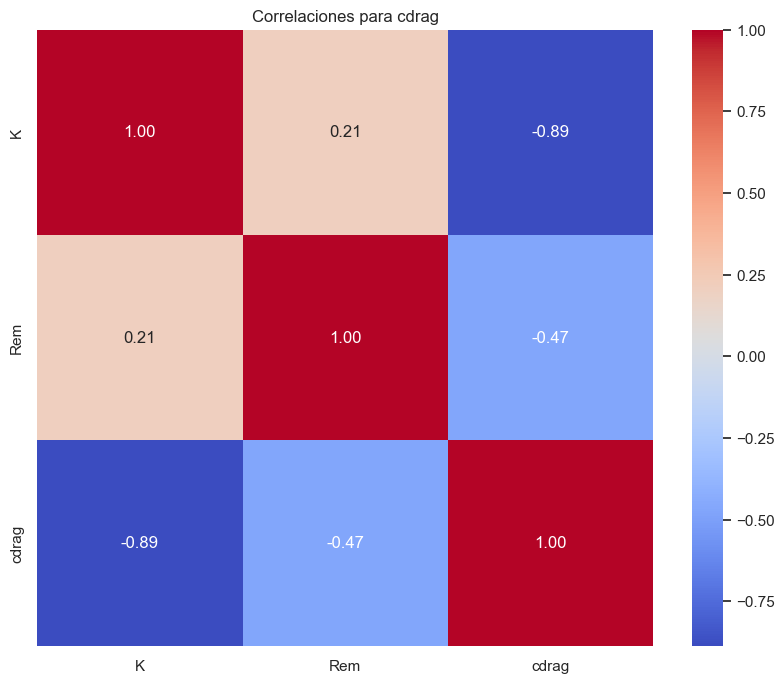

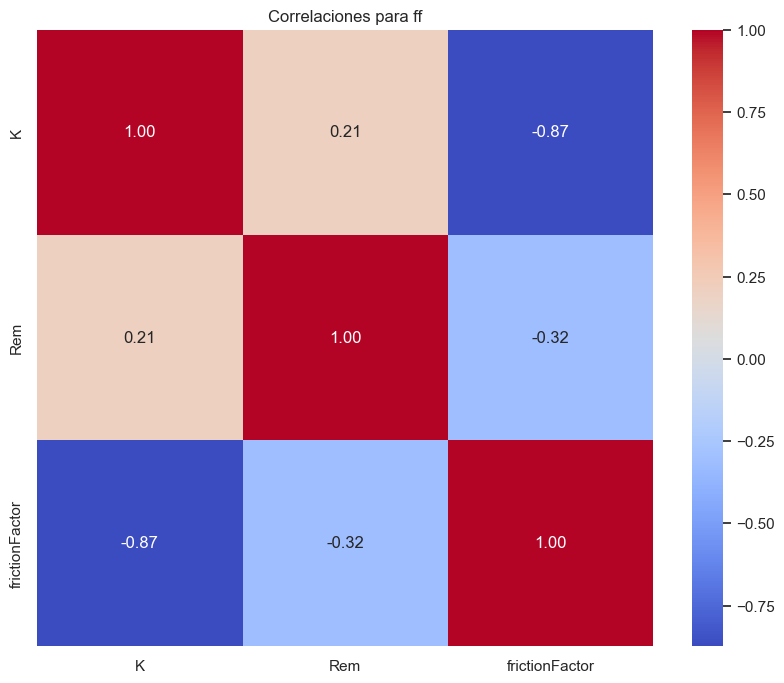

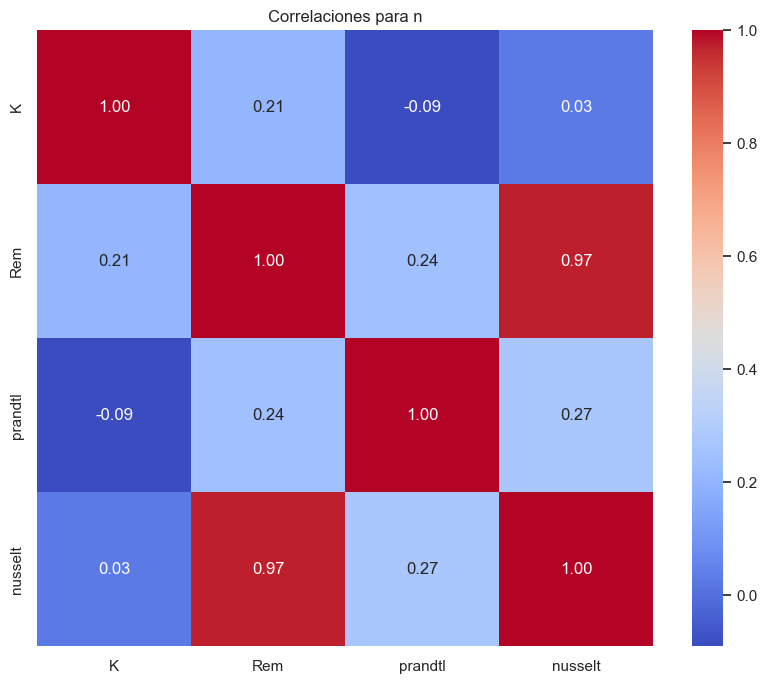

In [11]:
# Se obtiene grilla con la correlación de las variables con cdrag desde el df cdrag concat
corr_cdrag = df_cdrag_concat.corr()
# Se obtiene grilla con la correlación de las variables con ff desde el df ff concat
corr_ff = df_ff_concat.corr()
# Se obtiene grilla con la correlación de las variables con n desde el df n concat
corr_n = df_n_concat.corr()

# Configuración para mostrar el mapa de calor más bonito con cuadrícula
sns.set(style="whitegrid")

# Se crea un mapa de calor para las correlaciones de cdrag
plt.figure(figsize=(10, 8))
sns.heatmap(corr_cdrag, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlaciones para cdrag")
plt.show()

# Se crea un mapa de calor para las correlaciones de ff
plt.figure(figsize=(10, 8))
sns.heatmap(corr_ff, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlaciones para ff")
plt.show()

# Se crea un mapa de calor para las correlaciones de n
plt.figure(figsize=(10, 8))
sns.heatmap(corr_n, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlaciones para n")
plt.show()


## cdrag

In [12]:
# Se obtiene grilla con la correlación de las variables con cdrag desde el df cdrag concat
corr_cdrag = df_cdrag_concat.corr()
# Se obtiene grilla con la correlación de las variables con ff desde el df ff concat
corr_ff = df_ff_concat.corr()
# Se obtiene grilla con la correlación de las variables con n desde el df n concat
corr_n = df_n_concat.corr()

# Se printea ahora las correlaciones
print("Correlaciones para cdrag")
print(corr_cdrag)
print("Correlaciones para ff")
print(corr_ff)
print("Correlaciones para n")
print(corr_n)


Correlaciones para cdrag
              K       Rem     cdrag
K      1.000000  0.207176 -0.885987
Rem    0.207176  1.000000 -0.472153
cdrag -0.885987 -0.472153  1.000000
Correlaciones para ff
                       K       Rem  frictionFactor
K               1.000000  0.207176       -0.872502
Rem             0.207176  1.000000       -0.315456
frictionFactor -0.872502 -0.315456        1.000000
Correlaciones para n
                K       Rem   prandtl   nusselt
K        1.000000  0.207176 -0.089261  0.027493
Rem      0.207176  1.000000  0.243319  0.972200
prandtl -0.089261  0.243319  1.000000  0.274386
nusselt  0.027493  0.972200  0.274386  1.000000


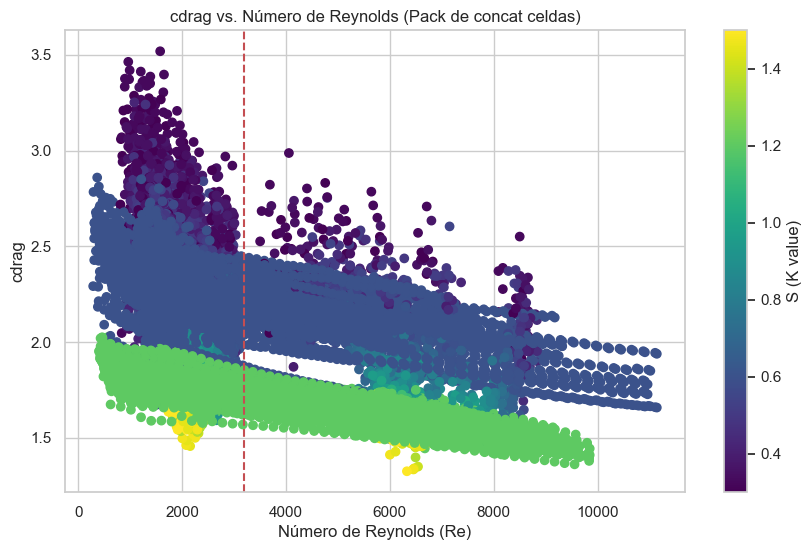

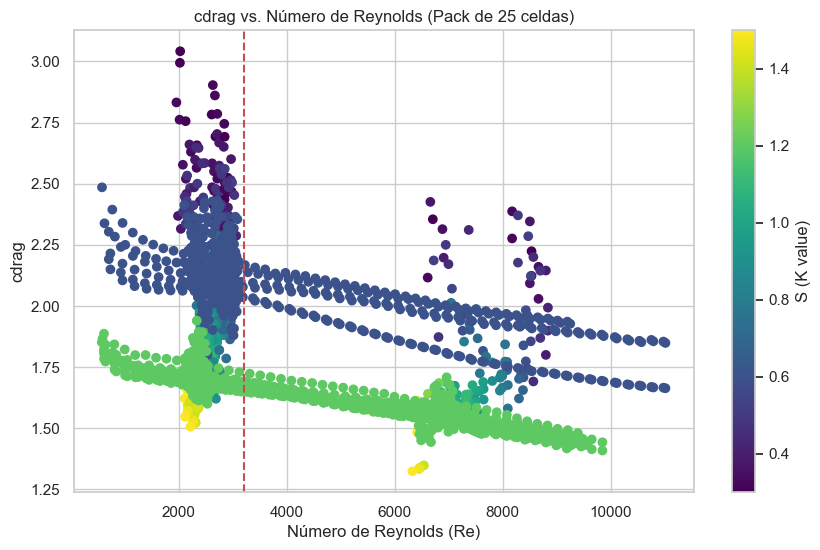

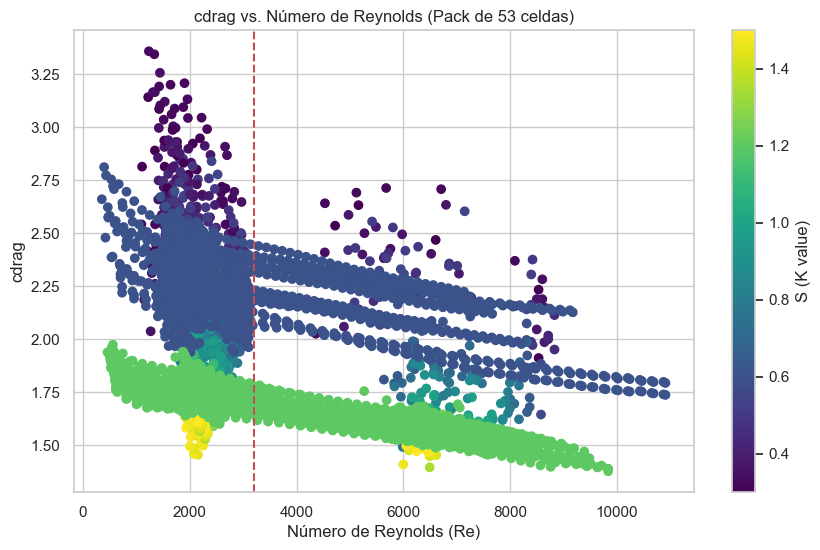

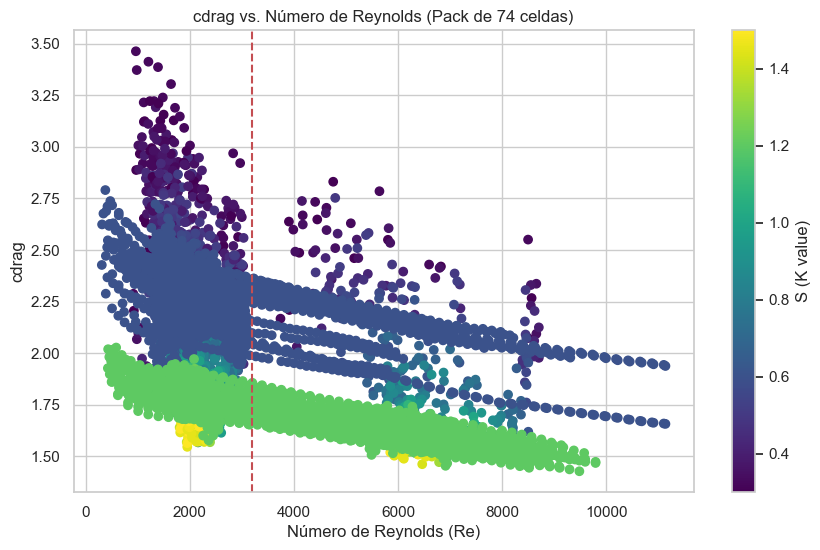

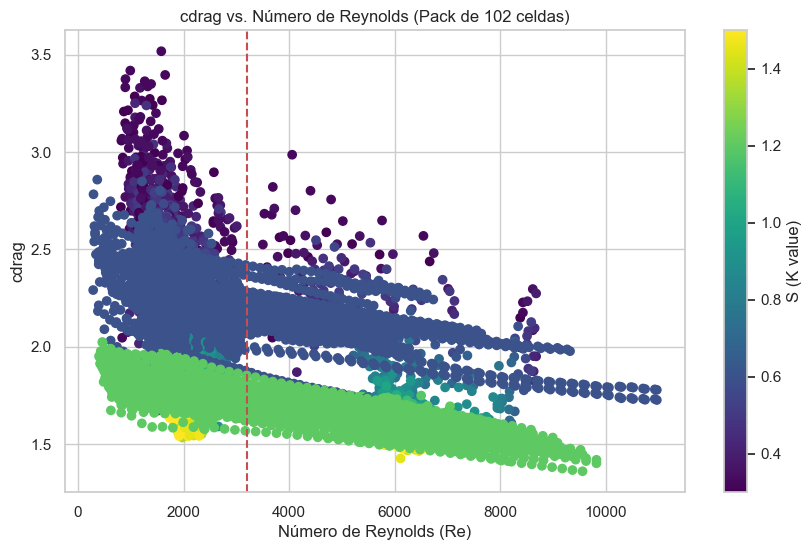

In [13]:
plot_coefficient(df_cdrag_concat,cell_count="concat",coef='cdrag')
plot_coefficient(df_cdrag_25,cell_count=25,coef='cdrag')
plot_coefficient(df_cdrag_53,cell_count=53,coef='cdrag')
plot_coefficient(df_cdrag_74,cell_count=74,coef='cdrag')
plot_coefficient(df_cdrag_102,cell_count=102,coef='cdrag')

## ff

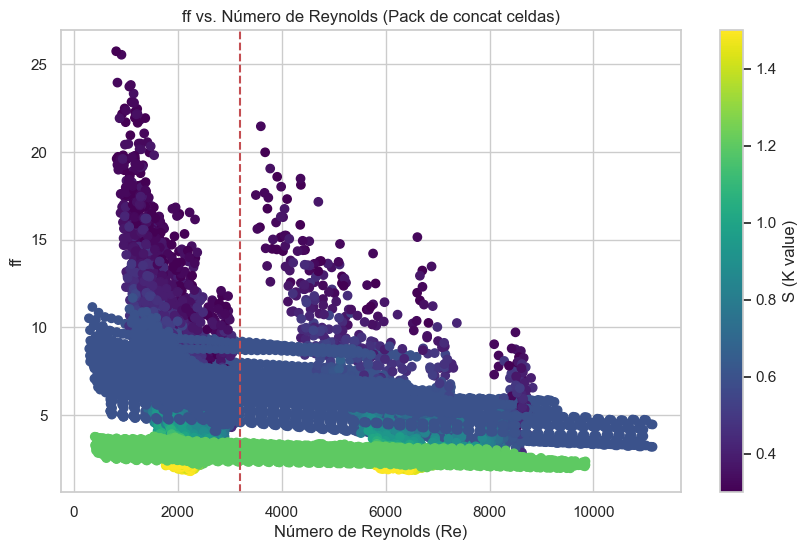

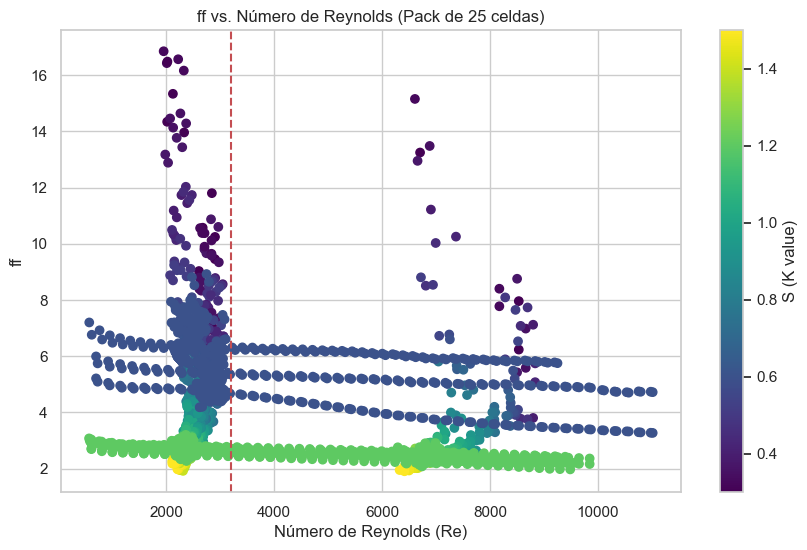

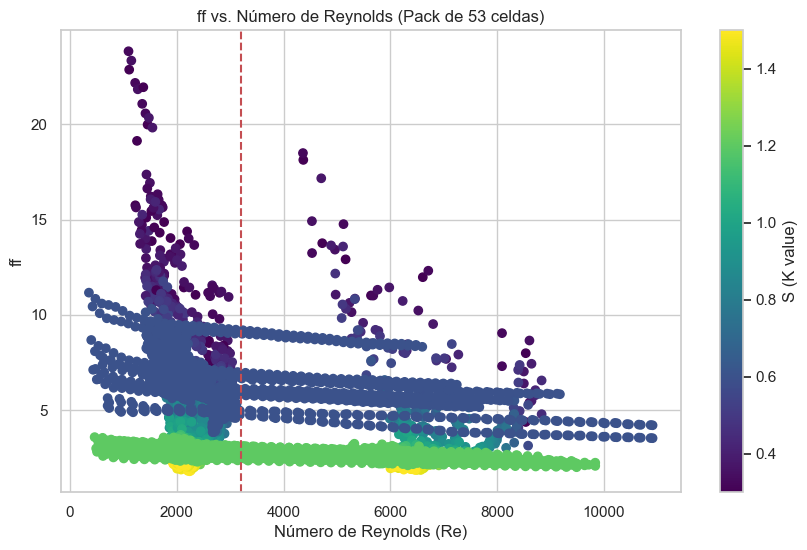

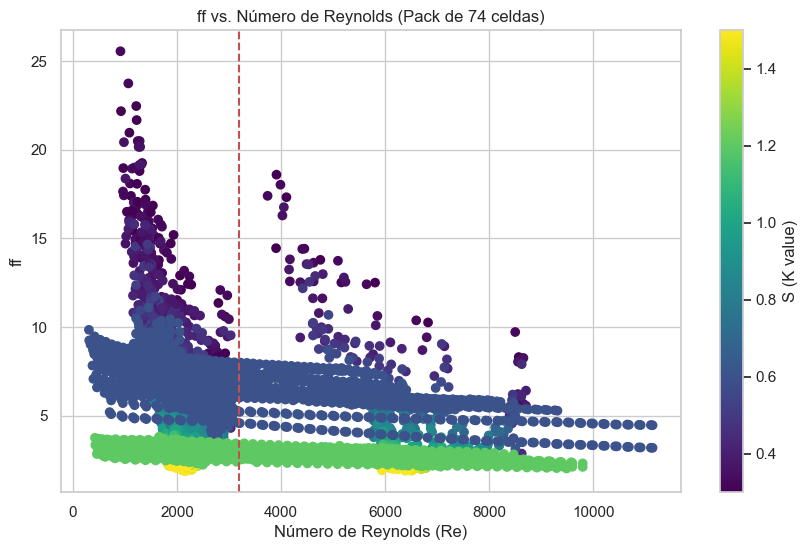

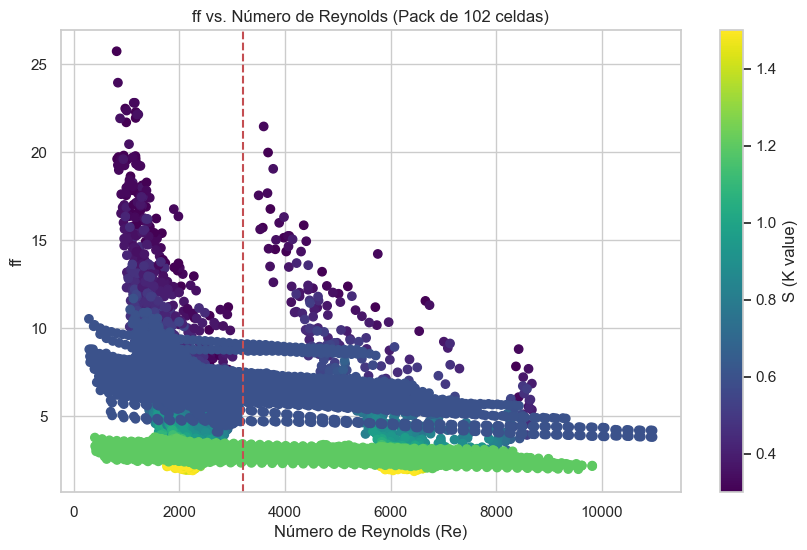

In [14]:
plot_coefficient(df_ff_concat,cell_count="concat",coef='ff')
plot_coefficient(df_ff_25,cell_count=25,coef='ff')
plot_coefficient(df_ff_53,cell_count=53,coef='ff')
plot_coefficient(df_ff_74,cell_count=74,coef='ff')
plot_coefficient(df_ff_102,cell_count=102,coef='ff')

## n

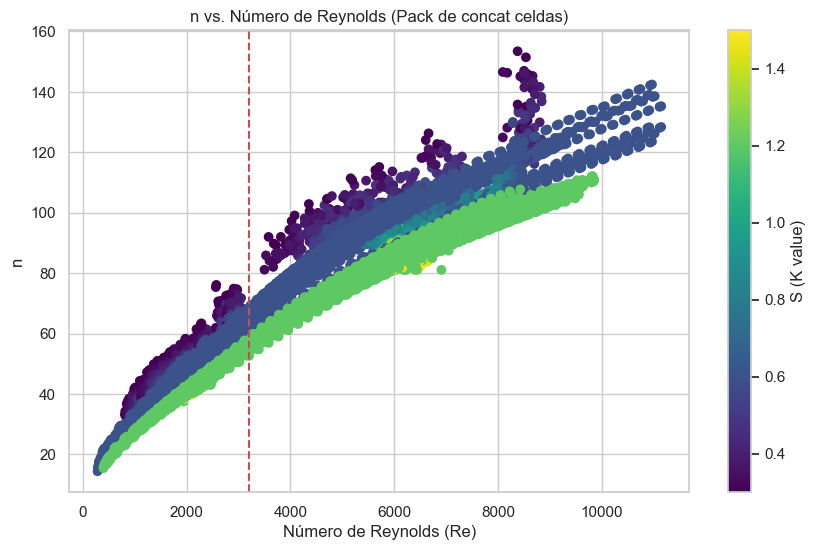

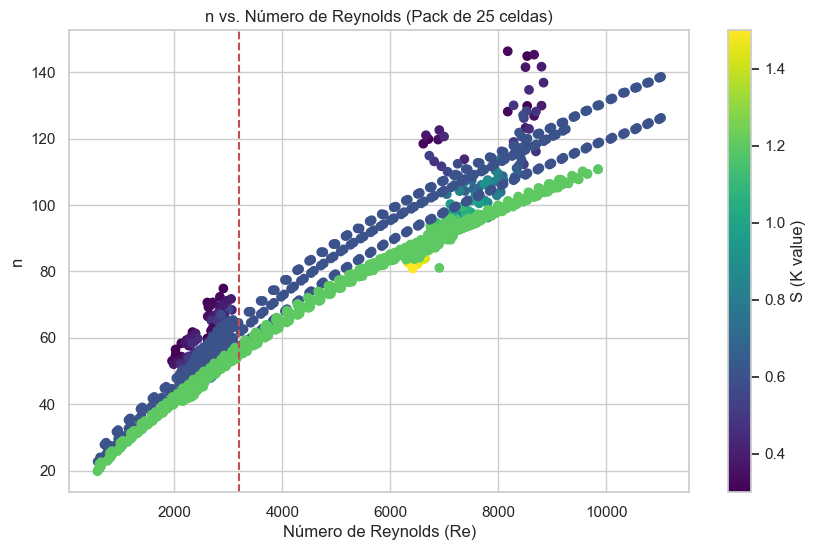

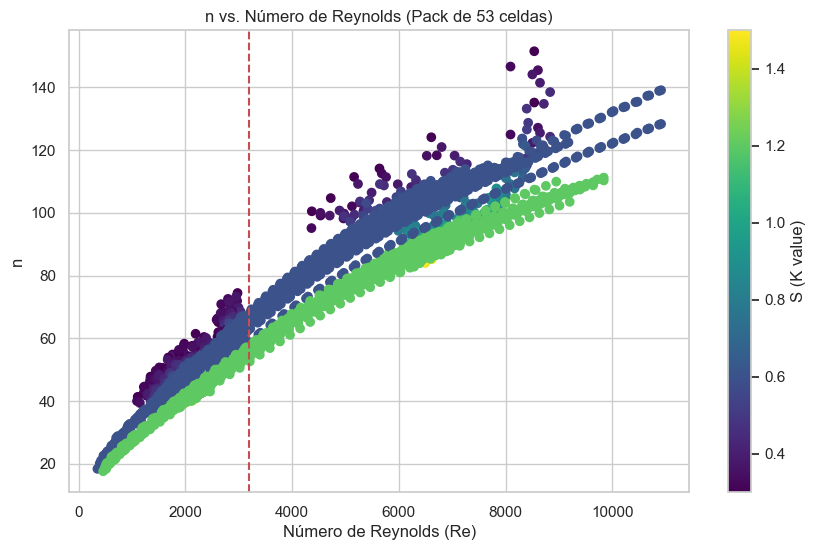

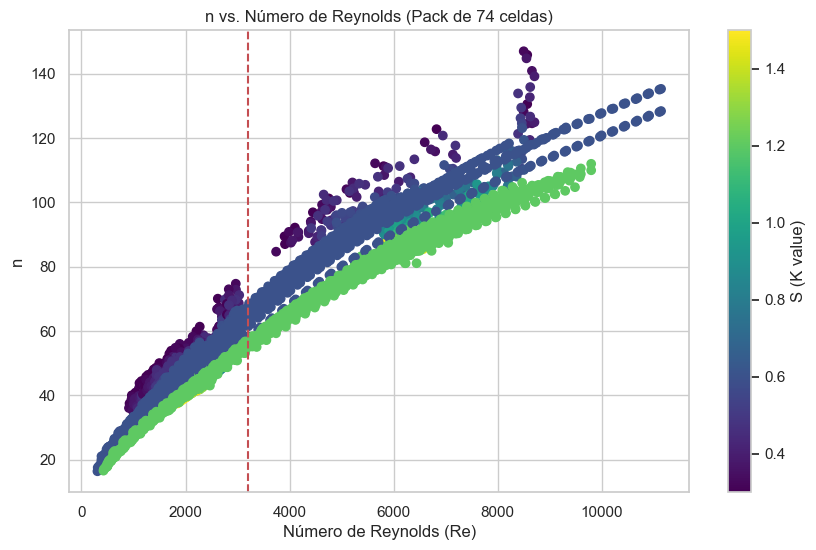

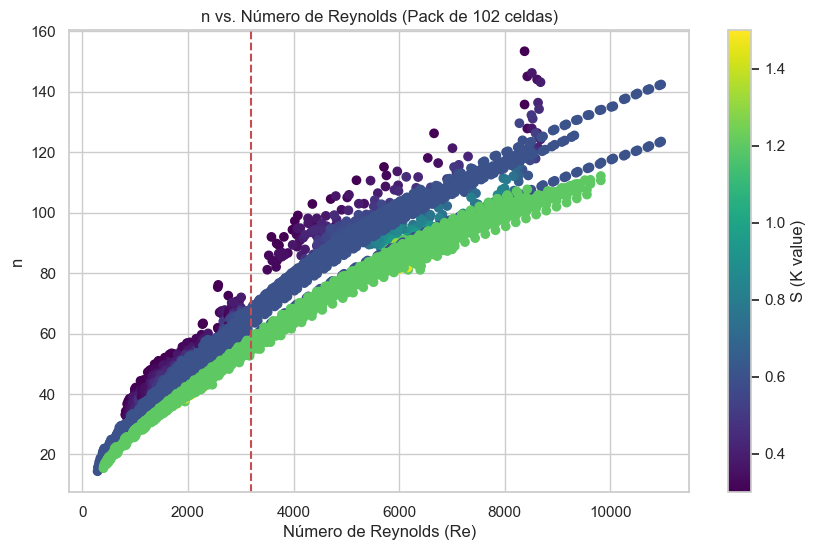

In [15]:
plot_coefficient(df_n_concat,cell_count="concat",coef='n')
plot_coefficient(df_n_25,cell_count=25,coef='n')
plot_coefficient(df_n_53,cell_count=53,coef='n')
plot_coefficient(df_n_74,cell_count=74,coef='n')
plot_coefficient(df_n_102,cell_count=102,coef='n')

# Desempeño modelos

In [16]:
iteraciones = 10

# Desempeño modelo original

In [17]:
original_results = load_results(iteraciones,suf="original")

## evolution per iteration

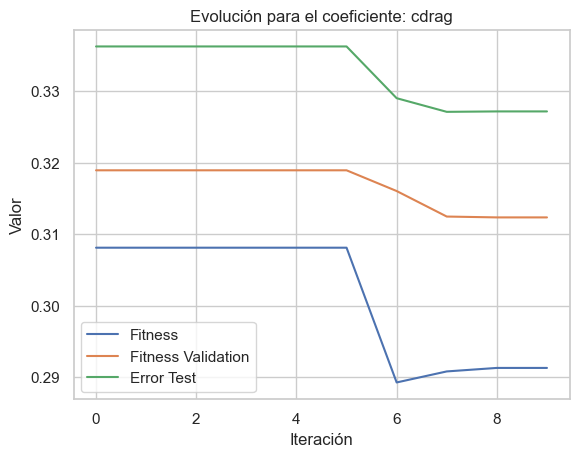

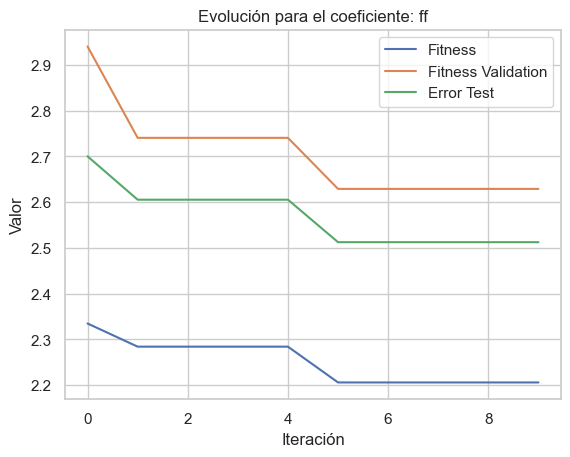

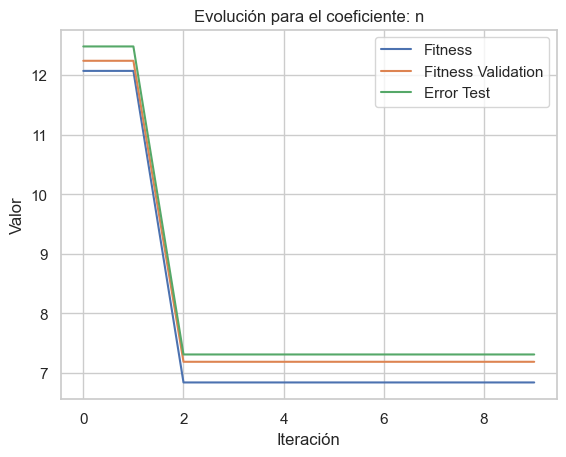

In [18]:
plot_evolution(original_results,iteraciones,structure_type="original")

## mejores individuos

In [19]:
original_best_ind = best_ind(original_results,iteraciones,structure_type="original")
print_best_ind_info(original_best_ind,structure_type="original")

Best individual for cdrag:
Error Test: 0.32716276061074095
phenotype: ((Constant**Constant)**Constant)+(Constant**Constant)
numeral-phenotype: ((0.31762263475473496**0.1250451140454335)**0.5128189823278095)+(0.9464581439836621**0.28718034803111303)
-----------------------------------------------------------------------------
Best individual for ff:
Error Test: 2.5123885986750993
phenotype: (Constant/Constant+Constant)
numeral-phenotype: (0.8799186229329967/0.24496340762405544+0.8962502934137434)
-----------------------------------------------------------------------------
Best individual for n:
Error Test: 7.3102358455968295
phenotype: (Constant**Constant) * (x[1]**Constant) * (x[2])
numeral-phenotype: (0.3999224046400479**0.03573918194113368) * (x[1]**0.545158997915336) * (x[2])
-----------------------------------------------------------------------------


## Calculo de errores

In [20]:
test_diccionario = {'cdrag':df_cdrag_53, 'ff': df_ff_53, 'n': df_n_53}

### EXTRA PROPUESTO

In [21]:
# Cargar los datos de los archivos proporcionados
df_n = pd.read_csv('resources/LIB/CI/df_n_53.txt', sep=',')
df_ff = pd.read_csv('resources/LIB/CI/df_ff_53.txt', sep=',')
df_cdrag = pd.read_csv('resources/LIB/CI/df_cdrag_53.txt', sep=',')

# Definir las ecuaciones como funciones de Python
def cdrag_eq(x):
    return (((x[0]*0.7584424063240567 + x[0] + x[1])**0.4565224341462174)**0.1463152370334997)

def ff_eq(x):
    return (x[0] + (0.42112349064365984 / x[0]) + 0.7009335647647842 / x[0] +
            (0.5291550863189122 / x[0]**0.7211249074104583) + (x[0] / x[1]) / (x[1] * x[1]))

def n_eq(x):
    return (((x[0] + x[0]) / 0.49205143325806766 * 0.3544989408948883)**0.08054636927325665) * (x[1]**0.5135999667923177) * x[2]

# def cdrag_eq(x):
#     return ((0.31762263475473496**0.1250451140454335)**0.5128189823278095)+(0.9464581439836621**0.28718034803111303)

# def ff_eq(x):
#     return (0.8799186229329967/0.24496340762405544+0.8962502934137434)

# def n_eq(x):
#     return (0.3999224046400479**0.03573918194113368) * (x[1]**0.545158997915336) * (x[2])



# Funciones para calcular MAE y MAPE
def mae(real, pred):
    return np.mean(np.abs(real - pred))

def mape(real, pred):
    # Evitar dividir por cero
    real = np.where(real == 0, np.finfo(float).eps, real)
    return np.mean(np.abs((real - pred) / real)) * 100

# Calcular predicciones y errores para cada coeficiente
errors = {}

# Coeficiente cdrag
cdrag_predictions = df_cdrag.apply(lambda row: cdrag_eq([row['K'], row['Rem']]), axis=1)
errors['cdrag'] = {
    'MAE': mae(df_cdrag['cdrag'], cdrag_predictions),
    'MAPE': mape(df_cdrag['cdrag'], cdrag_predictions)
}

# Coeficiente ff
ff_predictions = df_ff.apply(lambda row: ff_eq([row['K'], row['Rem']]), axis=1)
errors['ff'] = {
    'MAE': mae(df_ff['frictionFactor'], ff_predictions),
    'MAPE': mape(df_ff['frictionFactor'], ff_predictions)
}

# Coeficiente n
n_predictions = df_n.apply(lambda row: n_eq([row['K'], row['Rem'], row['prandtl']]), axis=1)
errors['n'] = {
    'MAE': mae(df_n['nusselt'], n_predictions),
    'MAPE': mape(df_n['nusselt'], n_predictions)
}

# Mostrar los errores calculados para cada coeficiente
for coef, err in errors.items():
    print(f'Coeficiente: {coef}')
    print(f'MAE: {err["MAE"]:.4f}')
    print(f'MAPE: {err["MAPE"]:.4f}\n')

Coeficiente: cdrag
MAE: 0.3006
MAPE: 14.3605

Coeficiente: ff
MAE: 1.4445
MAPE: 23.4950

Coeficiente: n
MAE: 13.6369
MAPE: 21.0419



### RESULTADO

In [22]:
error_calculate(test_diccionario,original_best_ind,structure_type="original")

Coeficiente: cdrag
MAE: 0.2837
MAPE: 14.8138

Coeficiente: ff
MAE: 1.9884
MAPE: 54.1666

Coeficiente: n
MAE: 5.1644
MAPE: 7.9764



# Desempeño modelo laminar vs turbulento

In [23]:
ch2_results = load_results(iteraciones,suf=choice_2)
ch2_best_ind = best_ind(ch2_results,iteraciones,structure_type=choice_2)

## evolution per iteration

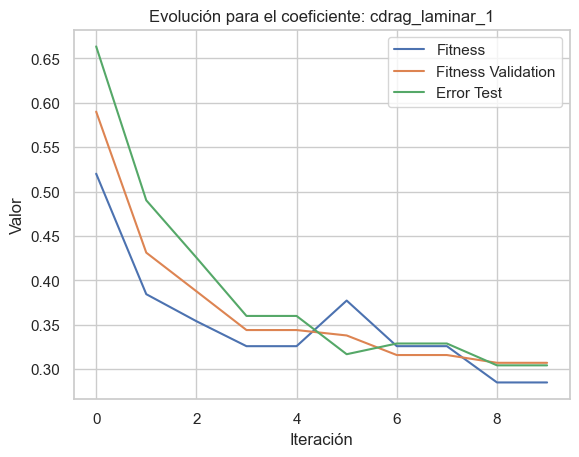

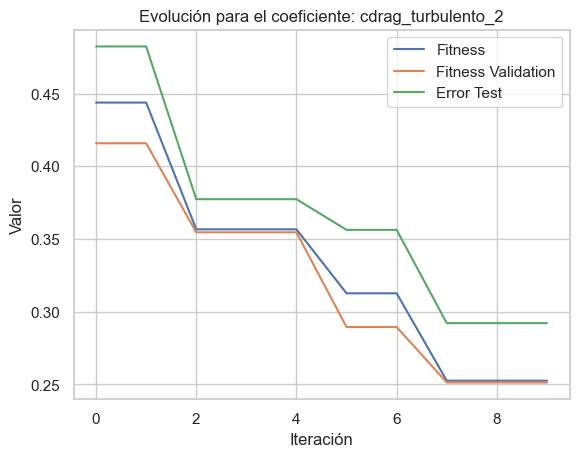

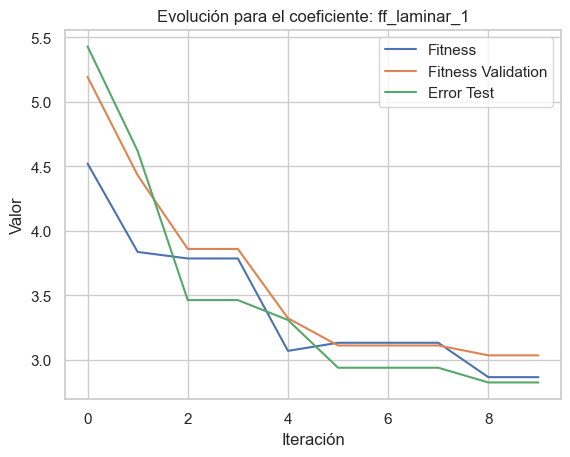

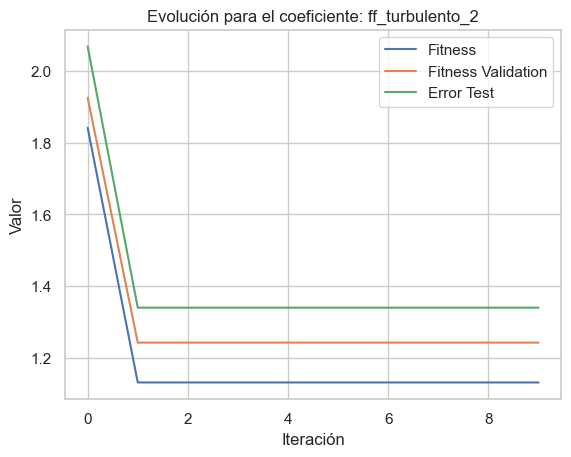

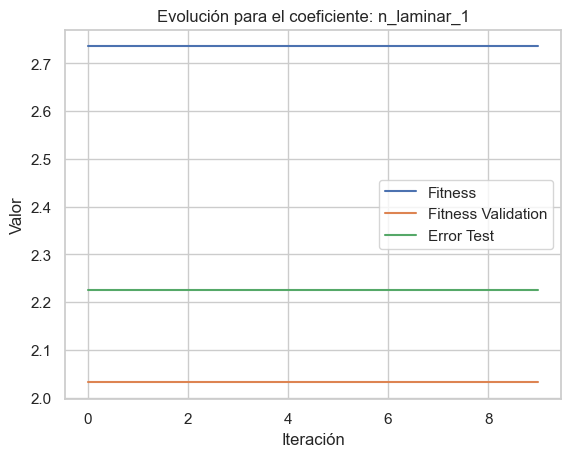

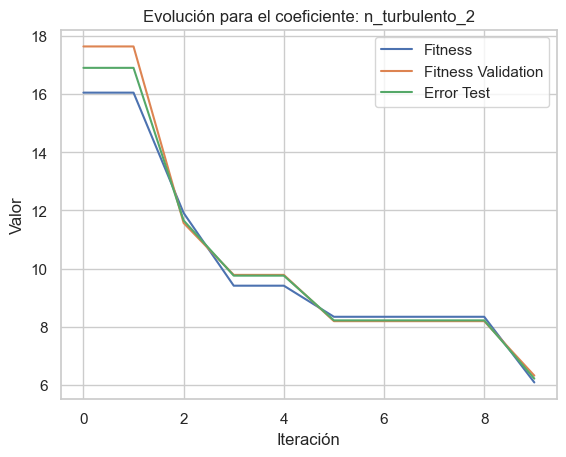

In [24]:
plot_evolution(ch2_results,iteraciones,structure_type=choice_2)

## mejores individuos

In [25]:
print_best_ind_info(ch2_best_ind,structure_type=choice_2)

Best individual for cdrag_laminar_1:
Error Test: 0.3043144189271584
phenotype: (Constant+((Constant+Constant)**Constant)/x[0])
numeral-phenotype: (0.7472620474698818+((0.49902013367191334+0.06127803945500898)**0.329746563634016)/x[0])
-----------------------------------------------------------------------------
Best individual for cdrag_turbulento_2:
Error Test: 0.2920234457764586
phenotype: (Constant**Constant)+(Constant**Constant)
numeral-phenotype: (0.9132911866881495**0.9844813664177023)+(0.8079689531774689**0.24083099483160764)
-----------------------------------------------------------------------------
Best individual for ff_laminar_1:
Error Test: 2.824466577569667
phenotype: ((x[1]/x[1]**Constant)+Constant/Constant-Constant-x[0]**Constant)
numeral-phenotype: ((x[1]/x[1]**0.7776535691412987)+0.9893561543542246/0.6172156017246897-0.20847132358860676-x[0]**0.6881547295038667)
-----------------------------------------------------------------------------
Best individual for ff_turbu

## Calculo de errores

### RESULTADO

In [26]:
error_calculate(df_test_ch2,ch2_best_ind,structure_type=choice_2)

Coeficiente: cdrag_laminar_1
MAE: 0.2719
MAPE: 12.6981

--------------------------------------------------------
Coeficiente: cdrag_turbulento_2
MAE: 0.2418
MAPE: 13.1182

--------------------------------------------------------
Coeficiente: ff_laminar_1
MAE: 2.2308
MAPE: 40.7698

--------------------------------------------------------
Coeficiente: ff_turbulento_2
MAE: 0.6956
MAPE: 14.1535

--------------------------------------------------------
Coeficiente: n_laminar_1
MAE: 1.9532
MAPE: 4.6521

--------------------------------------------------------
Coeficiente: n_turbulento_2
MAE: 5.4883
MAPE: 9.0895

--------------------------------------------------------


# Desempeño modelo laminar vs turbulento 50 iteraciones

In [27]:
iteraciones = 51

In [28]:
ch4_results = load_results(iteraciones,suf=choice_4)
ch4_best_ind = best_ind(ch4_results,iteraciones,structure_type=choice_4)

## evolution per iteration

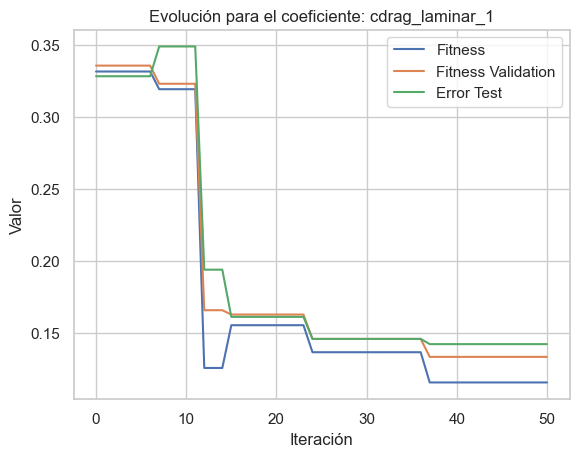

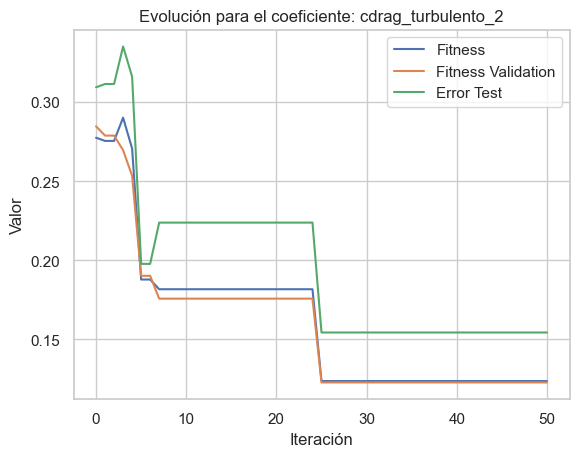

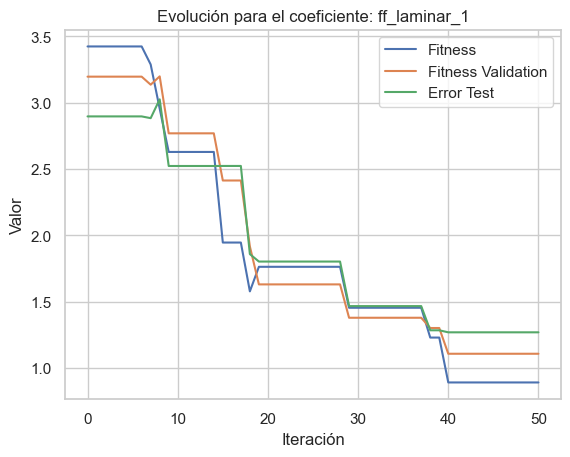

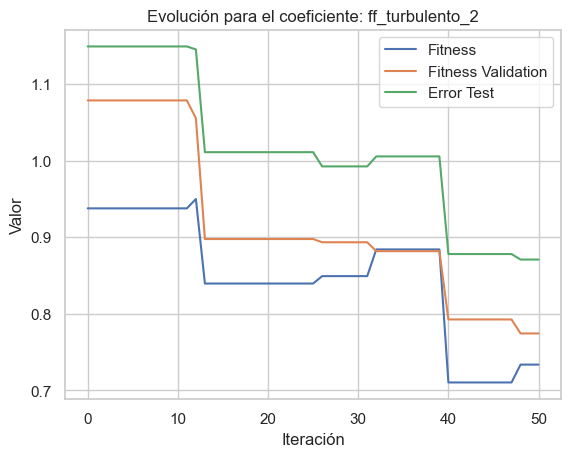

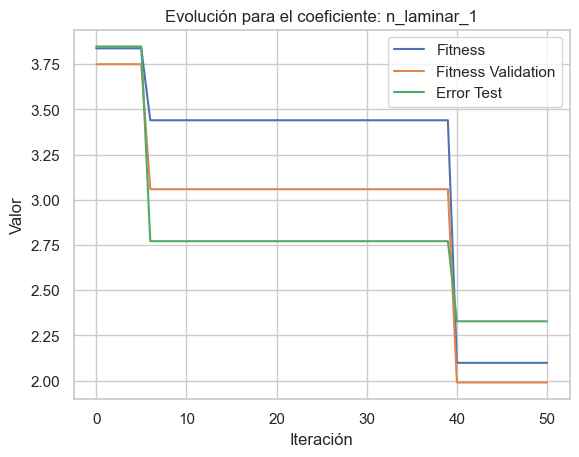

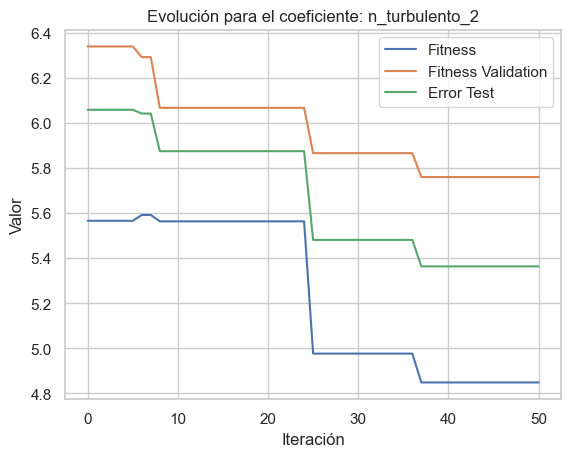

In [29]:
plot_evolution(ch4_results,iteraciones,structure_type=choice_4)

## mejores individuos

In [30]:
print_best_ind_info(ch4_best_ind,structure_type=choice_4)

Best individual for cdrag_laminar_1:
Error Test: 0.14217215648642295
phenotype: Constant+(Constant+Constant)/Constant/(x[0]**Constant)
numeral-phenotype: 0.848831369319495+(0.28327529110596583+0.7440338041754702)/0.9533532711117679/(x[0]**0.5618283498307562)
-----------------------------------------------------------------------------
Best individual for cdrag_turbulento_2:
Error Test: 0.15441787720151487
phenotype: (Constant+Constant)/((x[0]*x[0])**Constant)+(Constant**Constant)
numeral-phenotype: (0.15244049563765916+0.7358511916204938)/((x[0]*x[0])**0.284718062292612)+(0.32747462839688457**0.13875084744066624)
-----------------------------------------------------------------------------
Best individual for ff_laminar_1:
Error Test: 1.2692709437936518
phenotype: (Constant/Constant/x[0]/(x[0]**Constant)+(x[1]/x[1]))
numeral-phenotype: (0.7165551498409471/0.2888506127570609/x[0]/(x[0]**0.6076532527590524)+(x[1]/x[1]))
--------------------------------------------------------------------

## Calculo de errores

### RESULTADO

In [31]:
error_calculate(df_test_ch2,ch4_best_ind,structure_type=choice_4)

Coeficiente: cdrag_laminar_1
MAE: 0.1127
MAPE: 4.9831

--------------------------------------------------------
Coeficiente: cdrag_turbulento_2
MAE: 0.1122
MAPE: 5.8660

--------------------------------------------------------
Coeficiente: ff_laminar_1
MAE: 0.8252
MAPE: 11.0300

--------------------------------------------------------
Coeficiente: ff_turbulento_2
MAE: 0.4554
MAPE: 11.0374

--------------------------------------------------------
Coeficiente: n_laminar_1
MAE: 2.0154
MAPE: 4.7123

--------------------------------------------------------
Coeficiente: n_turbulento_2
MAE: 3.7391
MAPE: 5.7726

--------------------------------------------------------


# Desempeño modelo por inspección

In [32]:
iteraciones = 10

In [33]:
ch3_results = load_results(iteraciones,suf=choice_3)
ch3_best_ind = best_ind(ch3_results,iteraciones,structure_type=choice_3)

## evolution per iteration

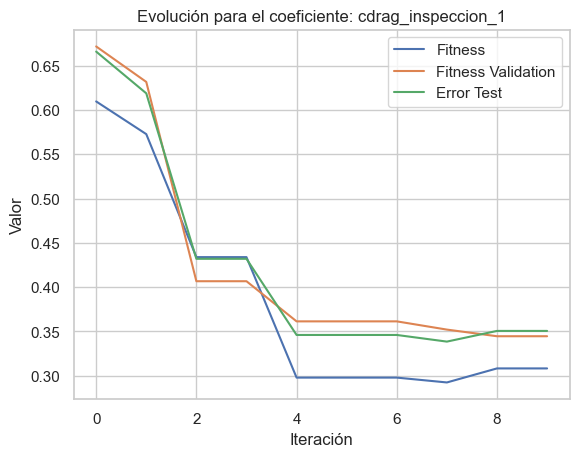

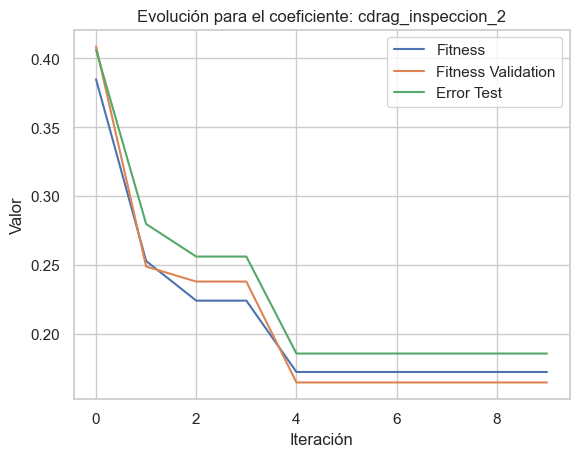

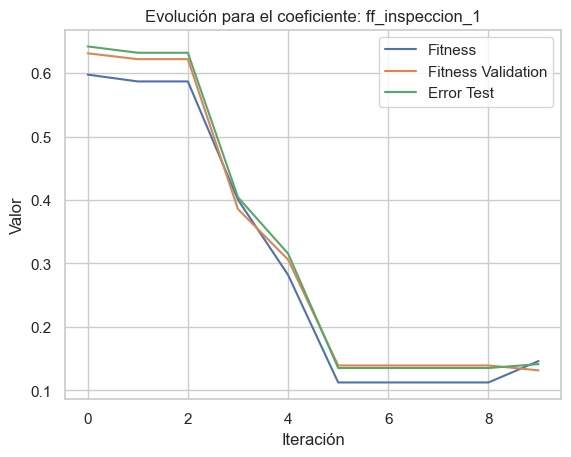

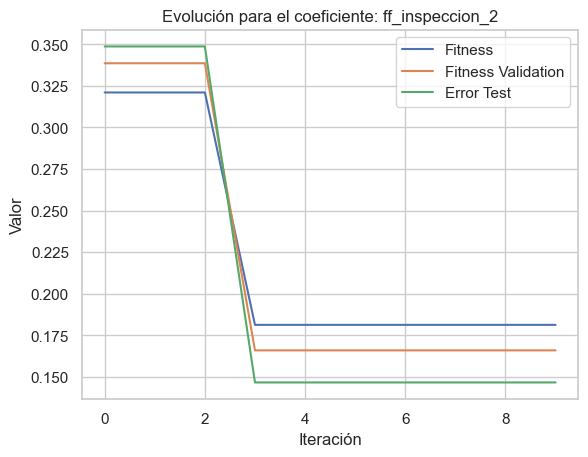

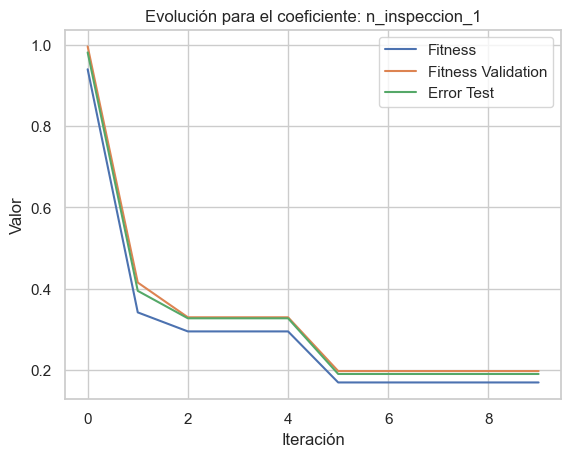

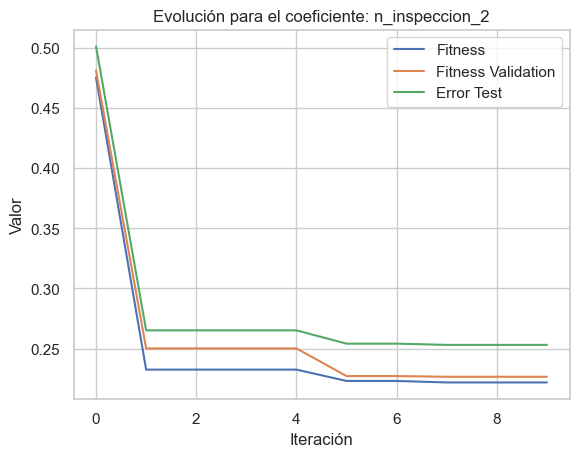

In [34]:
plot_evolution(ch3_results,iteraciones,structure_type=choice_3)

## mejores individuos

In [35]:
print_best_ind_info(ch3_best_ind,structure_type=choice_3)

Best individual for cdrag_inspeccion_1:
Error Test: 0.3506181475960648
phenotype: ((Constant**Constant)+(x[0]**Constant)**Constant)
numeral-phenotype: ((0.9430505119582197**0.9950083599461604)+(x[0]**0.2573040391518323)**0.3493743890320644)
-----------------------------------------------------------------------------
Best individual for cdrag_inspeccion_2:
Error Test: 0.1856551091390711
phenotype: (x[0]+(Constant/(Constant*x[0])))-Constant
numeral-phenotype: (x[0]+(0.9108115263430473/(0.9457480205141005*x[0])))-0.28745252148030775
-----------------------------------------------------------------------------
Best individual for ff_inspeccion_1:
Error Test: 0.14147950900477727
phenotype: ((Constant/x[0]**Constant)+Constant/x[1]+(x[0]+Constant)**Constant)
numeral-phenotype: ((0.806050914347261/x[0]**0.7761235270358079)+0.3834037723917/x[1]+(x[0]+0.9492029066413495)**0.1714126857583793)
-----------------------------------------------------------------------------
Best individual for ff_ins

## Calculo de errores

### RESULTADO

In [36]:
error_calculate(df_test_ch3,ch3_best_ind,structure_type=choice_3)

Coeficiente: cdrag_inspeccion_1
MAE: 0.3046
MAPE: 14.8598

--------------------------------------------------------
Coeficiente: cdrag_inspeccion_2
MAE: 0.1622
MAPE: 9.5309

--------------------------------------------------------
Coeficiente: ff_inspeccion_1
MAE: 2.5190
MAPE: 46.6291

--------------------------------------------------------
Coeficiente: ff_inspeccion_2
MAE: 1.6881
MAPE: 44.6523

--------------------------------------------------------
Coeficiente: n_inspeccion_1
MAE: 44.4324
MAPE: 95.9706

--------------------------------------------------------
Coeficiente: n_inspeccion_2
MAE: 89.0250
MAPE: 98.0512

--------------------------------------------------------


# Desempeño proposicion 1 sin ctes

In [37]:
iteraciones = 51

In [38]:
ch4_results = load_results(iteraciones,suf=prop_1)
ch4_best_ind = best_ind(ch4_results,iteraciones,structure_type=prop_1)

## evolution per iteration

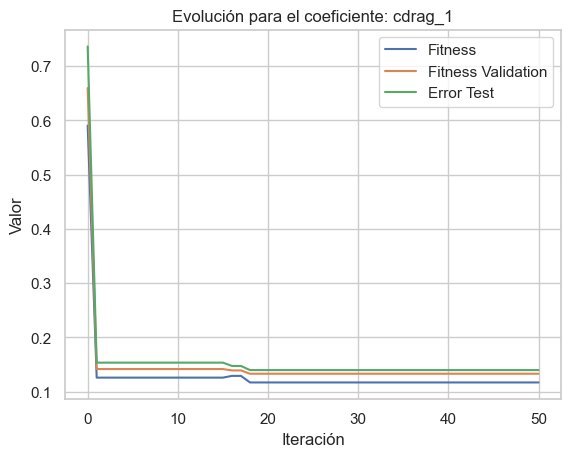

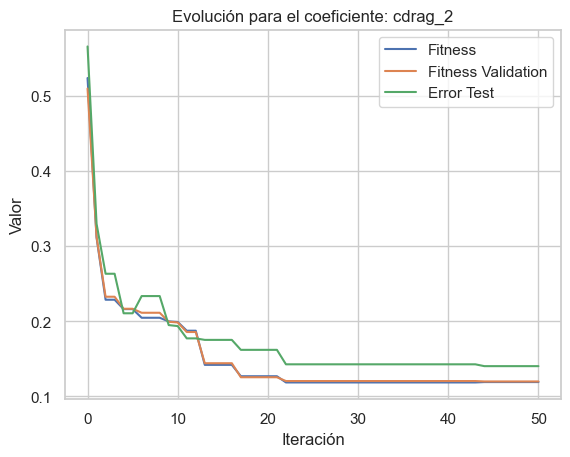

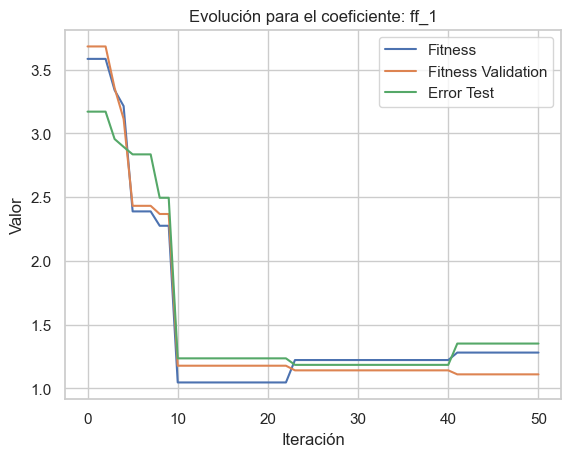

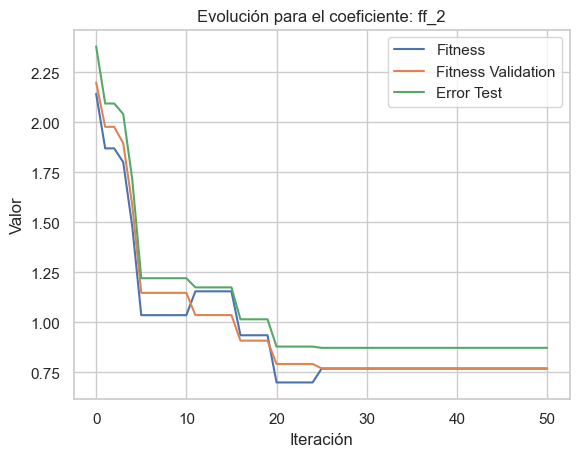

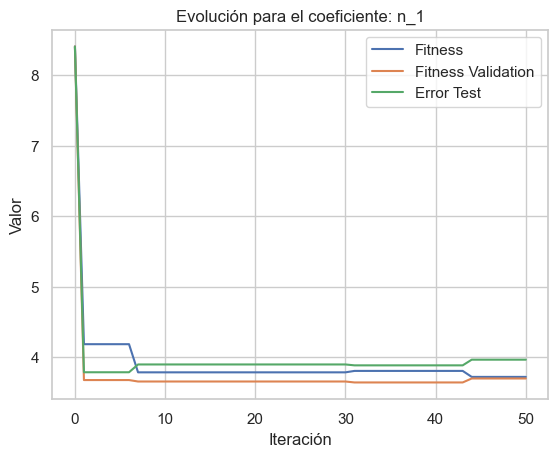

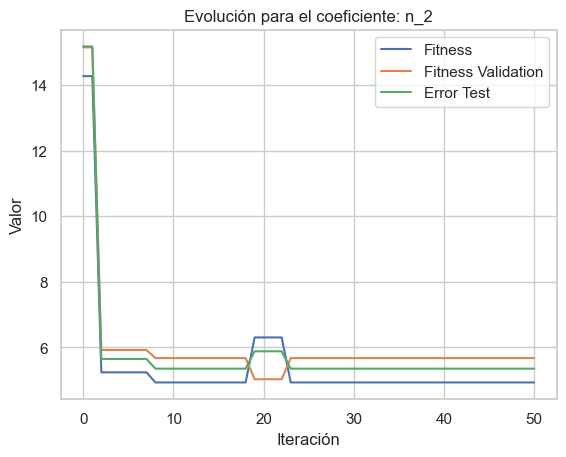

In [39]:
plot_evolution(ch4_results,iteraciones,structure_type=prop_1)

## mejores individuos

In [40]:
print_best_ind_info(ch4_best_ind,structure_type=prop_1)

Best individual for cdrag_1:
Error Test: 0.13987238915080427
phenotype: (Constant**Constant)+(Constant/x[0]**Constant)
numeral-phenotype: (0.6786763476783808**0.06599167119181437)+(0.9544230435905346/x[0]**0.6416451267555208)
-----------------------------------------------------------------------------
Best individual for cdrag_2:
Error Test: 0.14026660329358123
phenotype: ((Constant/x[0]**Constant)+((Constant/x[0])**Constant)**Constant)
numeral-phenotype: ((0.8537518005848311/x[0]**0.49284940770392505)+((0.6244080918764405/x[0])**0.5762848140860604)**0.39112203081921393)
-----------------------------------------------------------------------------
Best individual for ff_1:
Error Test: 1.3511194955383026
phenotype: (x[0]/x[0]/Constant/x[0]+x[0]+((Constant+Constant)/x[0]/x[0]))
numeral-phenotype: (x[0]/x[0]/0.47436637882190236/x[0]+x[0]+((0.8522577930060864+0.3895499844308208)/x[0]/x[0]))
-----------------------------------------------------------------------------
Best individual for f

## Calculo de errores

### RESULTADO

In [42]:
error_calculate(df_test_ch2,ch4_best_ind,structure_type=prop_1)

Coeficiente: cdrag_1
MAE: 0.1095
MAPE: 4.8770

--------------------------------------------------------
Coeficiente: cdrag_2
MAE: 0.1035
MAPE: 5.5121

--------------------------------------------------------
Coeficiente: ff_1
MAE: 0.9817
MAPE: 17.5561

--------------------------------------------------------
Coeficiente: ff_2
MAE: 0.4656
MAPE: 11.4107

--------------------------------------------------------
Coeficiente: n_1
MAE: 3.6040
MAPE: 8.6378

--------------------------------------------------------
Coeficiente: n_2
MAE: 4.0369
MAPE: 6.3007

--------------------------------------------------------


# Desempeño proposicion 3 sin ctes

In [43]:
iteraciones = 51
choose = prop_3

In [44]:
ch4_results = load_results(iteraciones,suf=choose)
ch4_best_ind = best_ind(ch4_results,iteraciones,structure_type=choose)

## evolution per iteration

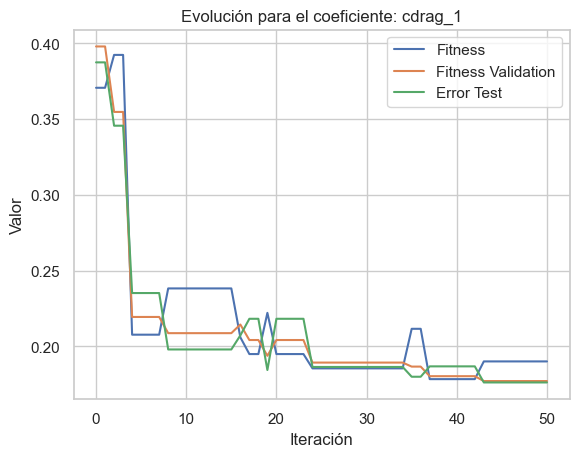

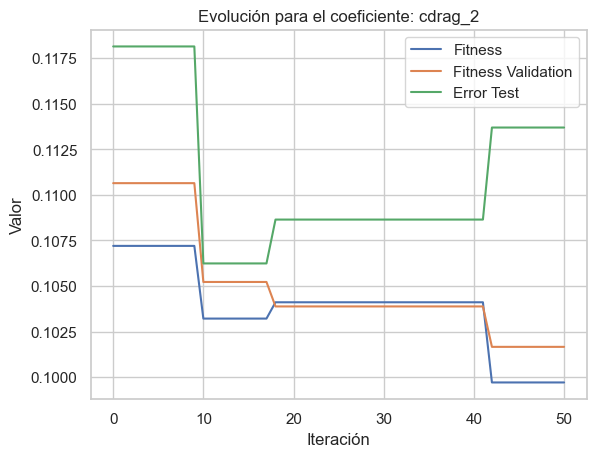

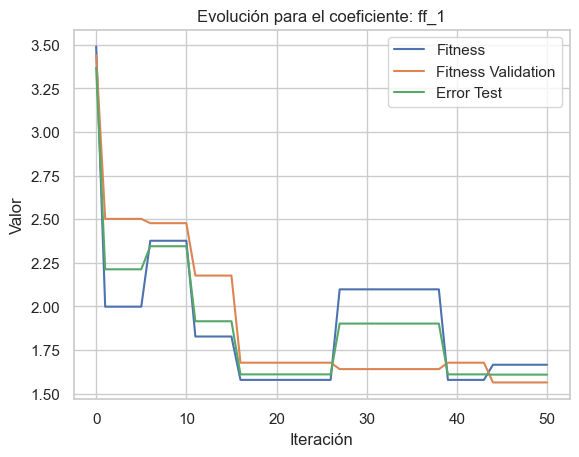

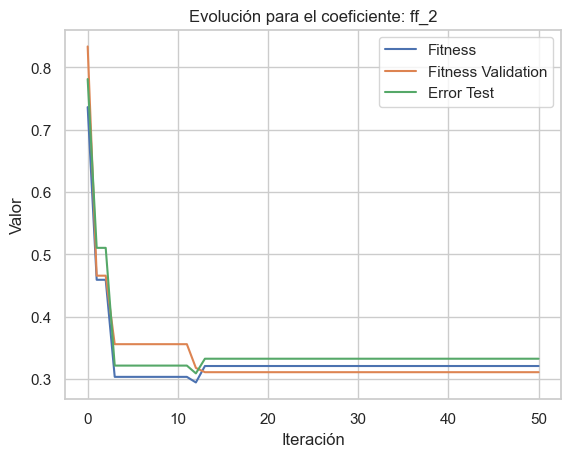

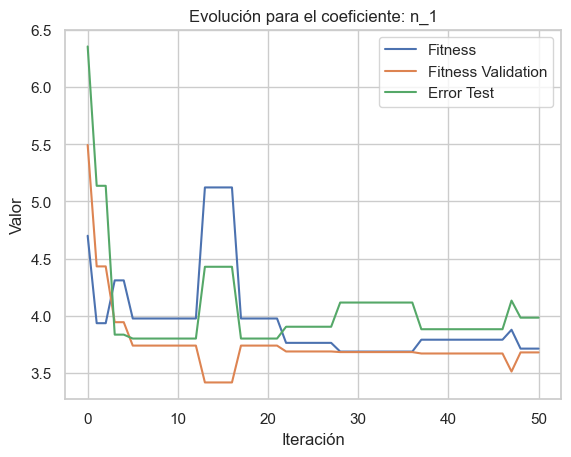

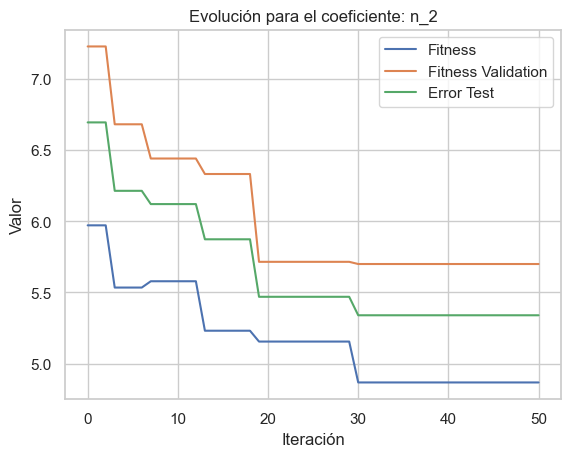

In [45]:
plot_evolution(ch4_results,iteraciones,structure_type=choose)

## mejores individuos

In [46]:
print_best_ind_info(ch4_best_ind,structure_type=choose)

Best individual for cdrag_1:
Error Test: 0.17625163094791824
phenotype: ((x[0]**Constant)/(x[0]**Constant)+Constant)
numeral-phenotype: ((x[0]**0.12968933618777734)/(x[0]**0.6253820749937834)+0.9575131123868412)
-----------------------------------------------------------------------------
Best individual for cdrag_2:
Error Test: 0.11369447075914497
phenotype: (((Constant**Constant)+(x[0]/x[1]**Constant))+Constant)
numeral-phenotype: (((0.49594897110268976**0.09101095156685346)+(x[0]/x[1]**0.252358487718627))+0.6278911355236189)
-----------------------------------------------------------------------------
Best individual for ff_1:
Error Test: 1.6085980799614554
phenotype: (((Constant+Constant/Constant/x[0])**Constant)-x[0])
numeral-phenotype: (((0.1900384412106335+0.9701801647980534/0.1498791934586533/x[0])**0.8396278793590487)-x[0])
-----------------------------------------------------------------------------
Best individual for ff_2:
Error Test: 0.33258224092228605
phenotype: x[0]/((C

## Calculo de errores

### RESULTADO

In [47]:
error_calculate(df_test_ch2,ch4_best_ind,structure_type=choose)

Coeficiente: cdrag_1
MAE: 0.1362
MAPE: 6.0381

--------------------------------------------------------
Coeficiente: cdrag_2
MAE: 0.2253
MAPE: 11.0459

--------------------------------------------------------
Coeficiente: ff_1
MAE: 0.8083
MAPE: 10.5853

--------------------------------------------------------
Coeficiente: ff_2
MAE: 0.5000
MAPE: 11.8501

--------------------------------------------------------
Coeficiente: n_1
MAE: 3.6325
MAPE: 8.6942

--------------------------------------------------------
Coeficiente: n_2
MAE: 3.9386
MAPE: 6.2085

--------------------------------------------------------
